# File and libraries

In [337]:
import pandas as pd
import numpy as np


filepath=r'data/df_gira_mv_input.csv'


file_tag = "Gira Bike"


# DSLabs functions

In [236]:
%run "scripts/dslabs_functions.py"


# Data functions

In [338]:
%run "scripts/data_functions.py"


data_functions lodaded


In [339]:
import pandas as pd

# Carregar o dataset
data = pd.read_csv(filepath, decimal=",", index_col='date', parse_dates=True, infer_datetime_format=True)

# Verificar os tipos de dados antes da conversão
display(data.dtypes)

# Forçar a conversão para o tipo numérico para todas as colunas que devem ser numéricas
# Selecionando todas as colunas, exceto o índice (que é de data)
numeric_columns = data.columns.difference(['date'])

# Tentar converter as colunas numéricas
for col in numeric_columns:
    data[col] = pd.to_numeric(data[col], errors='coerce')

# Verifique o tipo das colunas após a conversão
print("\nTipos de dados após a conversão:")
display(data.dtypes)

# Exibir as últimas linhas para confirmar que os dados estão corretos
display(data.tail())

display(data.index.min())
display(data.index.max())

display(data.shape)


temperature_2m                                                 object
rain_mm                                                        object
wmo_weather_code                                                int64
wind_speed_10m                                                 object
is_holiday_lisbon                                              object
target_station_status                                          object
target_station_load_rate                                       object
station_load_rate_ Rua do Arco Cego / Av. Magalhães Lima       object
station_load_rate_ Av. Rovisco Pais / Av. Manuel da Maia       object
station_load_rate_ Praça de Londres                            object
station_load_rate_ Av. Duque de Ávila / Jardim Arco Do Cego    object
station_load_rate_ Av. Barbosa Du Bocage / Rua Arco do Cego    object
dtype: object


Tipos de dados após a conversão:


temperature_2m                                                 float64
rain_mm                                                        float64
wmo_weather_code                                                 int64
wind_speed_10m                                                 float64
is_holiday_lisbon                                              float64
target_station_status                                          float64
target_station_load_rate                                       float64
station_load_rate_ Rua do Arco Cego / Av. Magalhães Lima       float64
station_load_rate_ Av. Rovisco Pais / Av. Manuel da Maia       float64
station_load_rate_ Praça de Londres                            float64
station_load_rate_ Av. Duque de Ávila / Jardim Arco Do Cego    float64
station_load_rate_ Av. Barbosa Du Bocage / Rua Arco do Cego    float64
dtype: object

,temperature_2m,rain_mm,wmo_weather_code,wind_speed_10m,is_holiday_lisbon,target_station_status,target_station_load_rate,station_load_rate_ Rua do Arco Cego / Av. Magalhães Lima,station_load_rate_ Av. Rovisco Pais / Av. Manuel da Maia,station_load_rate_ Praça de Londres,station_load_rate_ Av. Duque de Ávila / Jardim Arco Do Cego,station_load_rate_ Av. Barbosa Du Bocage / Rua Arco do Cego
date,,,,,,,,,,,,
2023-03-31 18:00:00,17.1,0.0,3,11.7,0.0,1.0,16.0,14.3,58.6,53.3,32.6,20.0
2023-03-31 19:00:00,15.7,0.0,3,7.9,0.0,1.0,20.0,36.7,47.5,28.6,15.2,20.0
2023-03-31 20:00:00,14.7,0.0,3,6.9,0.0,1.0,20.5,59.5,32.0,11.4,21.7,25.0
2023-03-31 21:00:00,13.6,0.0,3,5.1,0.0,1.0,42.9,44.3,46.2,16.7,10.8,30.0
2023-03-31 22:00:00,12.8,0.0,3,5.6,0.0,1.0,58.0,45.3,46.2,30.0,10.1,30.0


Timestamp('2022-01-01 12:00:00')

Timestamp('2023-03-31 22:00:00')

(10814, 12)

In [340]:

def series_train_test_split(data: Series, trn_pct: float = 0.80) -> tuple[Series, Series]:
    trn_size: int = int(len(data) * trn_pct)
    df_cp: Series = data.copy()

    # If data is a DataFrame, select the first column
    if isinstance(df_cp, pd.DataFrame):
        df_cp = df_cp.iloc[:, 0]  # Select first column to ensure it's a Series

    train: Series = df_cp.iloc[:trn_size]  
    test: Series = df_cp.iloc[trn_size:]  

    return train, test

In [341]:

# Function to split the series into train and test sets
def series_train_test_split(series, trn_pct=0.90):
    train_size = int(len(series) * trn_pct)
    train, test = series[:train_size], series[train_size:]
    return train, test

def plot_forecasting_eval(trn: Series, tst: Series, prd_trn: Series, prd_tst: Series, title: str = "") -> list[Axes]:
    ev1: dict = {
        "RMSE": [sqrt(FORECAST_MEASURES["MSE"](trn, prd_trn)), sqrt(FORECAST_MEASURES["MSE"](tst, prd_tst))],
        "MAE": [FORECAST_MEASURES["MAE"](trn, prd_trn), FORECAST_MEASURES["MAE"](tst, prd_tst)],
    }
    ev2: dict = {
        "MAPE": [FORECAST_MEASURES["MAPE"](trn, prd_trn), FORECAST_MEASURES["MAPE"](tst, prd_tst)],
        "R2": [FORECAST_MEASURES["R2"](trn, prd_trn), FORECAST_MEASURES["R2"](tst, prd_tst)],
    }

    # Print metric values
    print(f"\n### Forecasting Evaluation Metrics ({title}) ###")
    print(f"RMSE - Train: {ev1['RMSE'][0]:.4f}, Test: {ev1['RMSE'][1]:.4f}")
    print(f"MAE - Train: {ev1['MAE'][0]:.4f}, Test: {ev1['MAE'][1]:.4f}")
    print(f"MAPE - Train: {ev2['MAPE'][0]:.4f}, Test: {ev2['MAPE'][1]:.4f}")
    print(f"R2 - Train: {ev2['R2'][0]:.4f}, Test: {ev2['R2'][1]:.4f}\n")

    HEIGHT=6
    # Plot the metrics
    fig, axs = subplots(1, 2, figsize=(1.5 * HEIGHT, 0.75 * HEIGHT), squeeze=True)
    fig.suptitle(title)
    plot_multibar_chart(["train", "test"], ev1, ax=axs[0], title="Scale-dependent error", percentage=False)
    plot_multibar_chart(["train", "test"], ev2, ax=axs[1], title="Percentage error", percentage=True)
    return axs

# Scaling

## Scaling Treat 1 - Standard Scaler

### Scale 1 strategy Application

In [342]:
from sklearn.preprocessing import StandardScaler

def scale_all_dataframe(data: DataFrame) -> DataFrame:
    vars: list[str] = data.columns.to_list()
    transf: StandardScaler = StandardScaler().fit(data)
    df = DataFrame(transf.transform(data), index=data.index)
    df.columns = vars
    return df

In [343]:

def plot_line_chart(
    xvalues: list,
    yvalues: list,
    ax: Axes = None,  # type: ignore
    title: str = "",
    xlabel: str = "",
    ylabel: str = "",
    name: str = "",
    percentage: bool = False,
    show_stdev: bool = False,
) -> Axes:
    if ax is None:
        ax = gca()
    ax = set_chart_labels(ax=ax, title=title, xlabel=xlabel, ylabel=ylabel)
    ax = set_chart_xticks(xvalues, ax, percentage=percentage)
    if any(y < 0 for y in yvalues) and percentage:
            ax.set_ylim(-1.0, 1.0)
    ax.plot(xvalues, yvalues, c=LINE_COLOR, label=name)
    if show_stdev:
        stdev: float = round(std(yvalues), 3)
        y_bottom: list[float] = [(y - stdev) for y in yvalues]
        y_top: list[float] = [(y + stdev) for y in yvalues]
        ax.fill_between(xvalues, y_bottom, y_top, color=FILL_COLOR, alpha=0.2)
    return ax

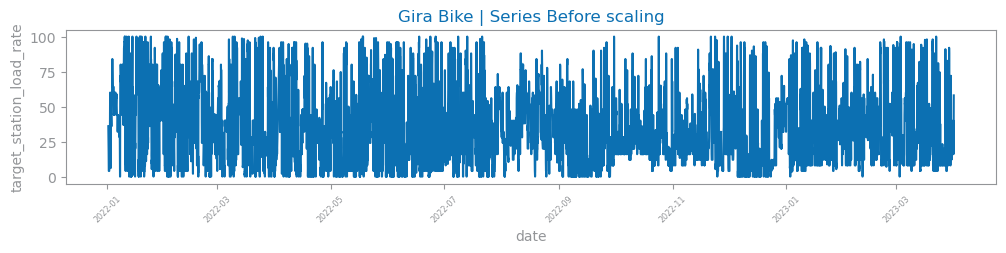

In [344]:
from pandas import read_csv, DataFrame, Series
from matplotlib.pyplot import figure, show
from dslabs_functions import plot_line_chart, HEIGHT


data_0 = data.copy()

df_0: DataFrame = data_0
series: Series = df_0[target]

figure(figsize=(3 * HEIGHT, HEIGHT / 2))
plot_line_chart(
    series.index.to_list(),
    series.to_list(),
    xlabel=series.index.name,
    ylabel=target,
    title=f"{file_tag} | Series Before scaling",
)
show()

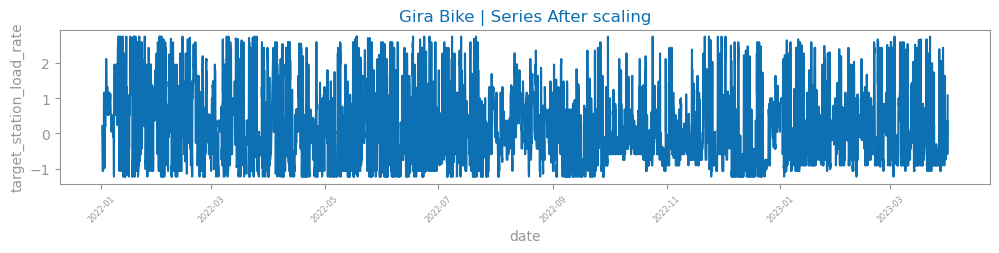

In [345]:

data_1 = data.copy()

df_1: DataFrame = scale_all_dataframe(data_1)

series_scaled: Series = df_1[target]
figure(figsize=(3 * HEIGHT, HEIGHT / 2))
plot_line_chart(
    series_scaled.index.to_list(),
    series_scaled.to_list(),
    xlabel=series_scaled.index.name,
    ylabel=target,
    title=f"{file_tag} | Series After scaling",
)
show()

### Scale 1 evaluate

#### No transformation

In [346]:

def series_train_test_split(data: Series, trn_pct: float = 0.80) -> tuple[Series, Series]:
    trn_size: int = int(len(data) * trn_pct)
    df_cp: Series = data.copy()

    # If data is a DataFrame, select the first column
    if isinstance(df_cp, pd.DataFrame):
        df_cp = df_cp.iloc[:, 0]  # Select first column to ensure it's a Series

    train: Series = df_cp.iloc[:trn_size]  
    test: Series = df_cp.iloc[trn_size:]  

    return train, test

In [347]:
def plot_forecasting_eval(trn: Series, tst: Series, prd_trn: Series, prd_tst: Series, title: str = "") -> list[Axes]:
    ev1: dict = {
        "RMSE": [sqrt(FORECAST_MEASURES["MSE"](trn, prd_trn)), sqrt(FORECAST_MEASURES["MSE"](tst, prd_tst))],
        "MAE": [FORECAST_MEASURES["MAE"](trn, prd_trn), FORECAST_MEASURES["MAE"](tst, prd_tst)],
    }
    ev2: dict = {
        "MAPE": [FORECAST_MEASURES["MAPE"](trn, prd_trn), FORECAST_MEASURES["MAPE"](tst, prd_tst)],
        "R2": [FORECAST_MEASURES["R2"](trn, prd_trn), FORECAST_MEASURES["R2"](tst, prd_tst)],
    }

    # Print metric values
    print(f"\n### Forecasting Evaluation Metrics ({title}) ###")
    print(f"RMSE - Train: {ev1['RMSE'][0]:.4f}, Test: {ev1['RMSE'][1]:.4f}")
    print(f"MAE - Train: {ev1['MAE'][0]:.4f}, Test: {ev1['MAE'][1]:.4f}")
    print(f"MAPE - Train: {ev2['MAPE'][0]:.4f}, Test: {ev2['MAPE'][1]:.4f}")
    print(f"R2 - Train: {ev2['R2'][0]:.4f}, Test: {ev2['R2'][1]:.4f}\n")

    HEIGHT=6
    # Plot the metrics
    fig, axs = subplots(1, 2, figsize=(1.5 * HEIGHT, 0.75 * HEIGHT), squeeze=True)
    fig.suptitle(title)
    plot_multibar_chart(["train", "test"], ev1, ax=axs[0], title="Scale-dependent error", percentage=False)
    plot_multibar_chart(["train", "test"], ev2, ax=axs[1], title="Percentage error", percentage=True)
    return axs

In [348]:
test_split_threshold=0.8


### Forecasting Evaluation Metrics (Gira Bike - Linear Regression no scaling) ###
RMSE - Train: 24.9192, Test: 25.8439
MAE - Train: 20.2343, Test: 18.1350
MAPE - Train: 10384555576774960.0000, Test: 247730850419147.1562
R2 - Train: 0.0461, Test: -0.2180



array([<Axes: title={'center': 'Scale-dependent error'}>,
       <Axes: title={'center': 'Percentage error'}>], dtype=object)

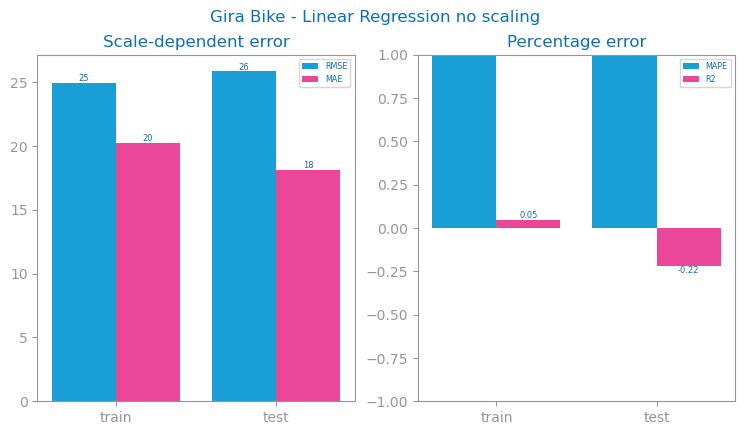

In [349]:
from sklearn.linear_model import LinearRegression
from matplotlib.pyplot import savefig
import pandas as pd
from numpy import arange


series = series.sort_index()

train, test = series_train_test_split(series, trn_pct=test_split_threshold)

trnX = arange(len(train)).reshape(-1, 1)
trnY = train.to_numpy()
tstX = arange(len(train), len(series)).reshape(-1, 1)
tstY = test.to_numpy()

model = LinearRegression()
model.fit(trnX, trnY)

prd_trn: Series = Series(model.predict(trnX), index=train.index)
prd_tst: Series = Series(model.predict(tstX), index=test.index)

plot_forecasting_eval(train, test, prd_trn, prd_tst, title=f"{file_tag} - Linear Regression no scaling")

In [350]:
print("Train - Min Date:", train.index.min(), " | Max Date:", train.index.max())
print("Test - Min Date:", test.index.min(), " | Max Date:", test.index.max())

Train - Min Date: 2022-01-01 12:00:00  | Max Date: 2022-12-30 19:00:00
Test - Min Date: 2022-12-30 20:00:00  | Max Date: 2023-03-31 22:00:00


#### with transformation

In [351]:
test_split_threshold=0.8


### Forecasting Evaluation Metrics (Gira Bike - Linear Regression Eval with Scaling) ###
RMSE - Train: 0.9924, Test: 1.0292
MAE - Train: 0.8058, Test: 0.7222
MAPE - Train: 1.2187, Test: 1.8434
R2 - Train: 0.0461, Test: -0.2180



array([<Axes: title={'center': 'Scale-dependent error'}>,
       <Axes: title={'center': 'Percentage error'}>], dtype=object)

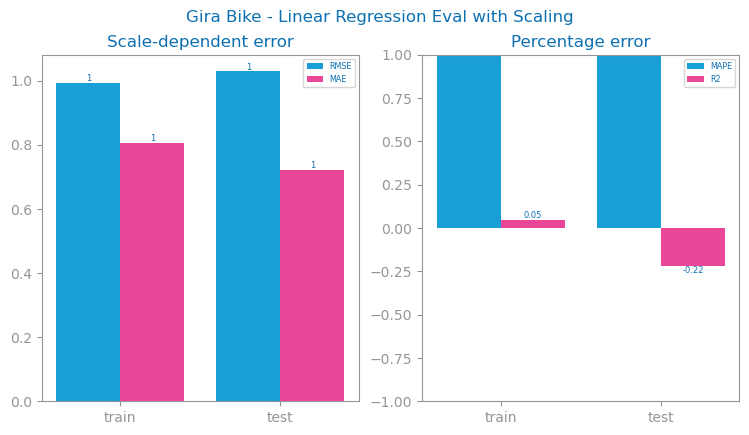

In [352]:
from sklearn.linear_model import LinearRegression
from matplotlib.pyplot import savefig
import pandas as pd
from numpy import arange


 
series_scaled = series_scaled.sort_index()

train, test = series_train_test_split(series_scaled, trn_pct=test_split_threshold)

trnX = arange(len(train)).reshape(-1, 1)
trnY = train.to_numpy()
tstX = arange(len(train), len(series_scaled)).reshape(-1, 1)
tstY = test.to_numpy()

model = LinearRegression()
model.fit(trnX, trnY)

prd_trn: Series = Series(model.predict(trnX), index=train.index)
prd_tst: Series = Series(model.predict(tstX), index=test.index)

plot_forecasting_eval(train, test, prd_trn, prd_tst, title=f"{file_tag} - Linear Regression Eval with Scaling")

In [353]:
print("Train - Min Date:", train.index.min(), " | Max Date:", train.index.max())
print("Test - Min Date:", test.index.min(), " | Max Date:", test.index.max())

Train - Min Date: 2022-01-01 12:00:00  | Max Date: 2022-12-30 19:00:00
Test - Min Date: 2022-12-30 20:00:00  | Max Date: 2023-03-31 22:00:00


In [354]:
series_scaled.head()

date
2022-01-01 12:00:00    0.206619
2022-01-01 13:00:00    0.047326
2022-01-01 14:00:00   -0.191614
2022-01-01 15:00:00   -0.430554
2022-01-01 16:00:00   -0.510200
Name: target_station_load_rate, dtype: float64

# scaling plot

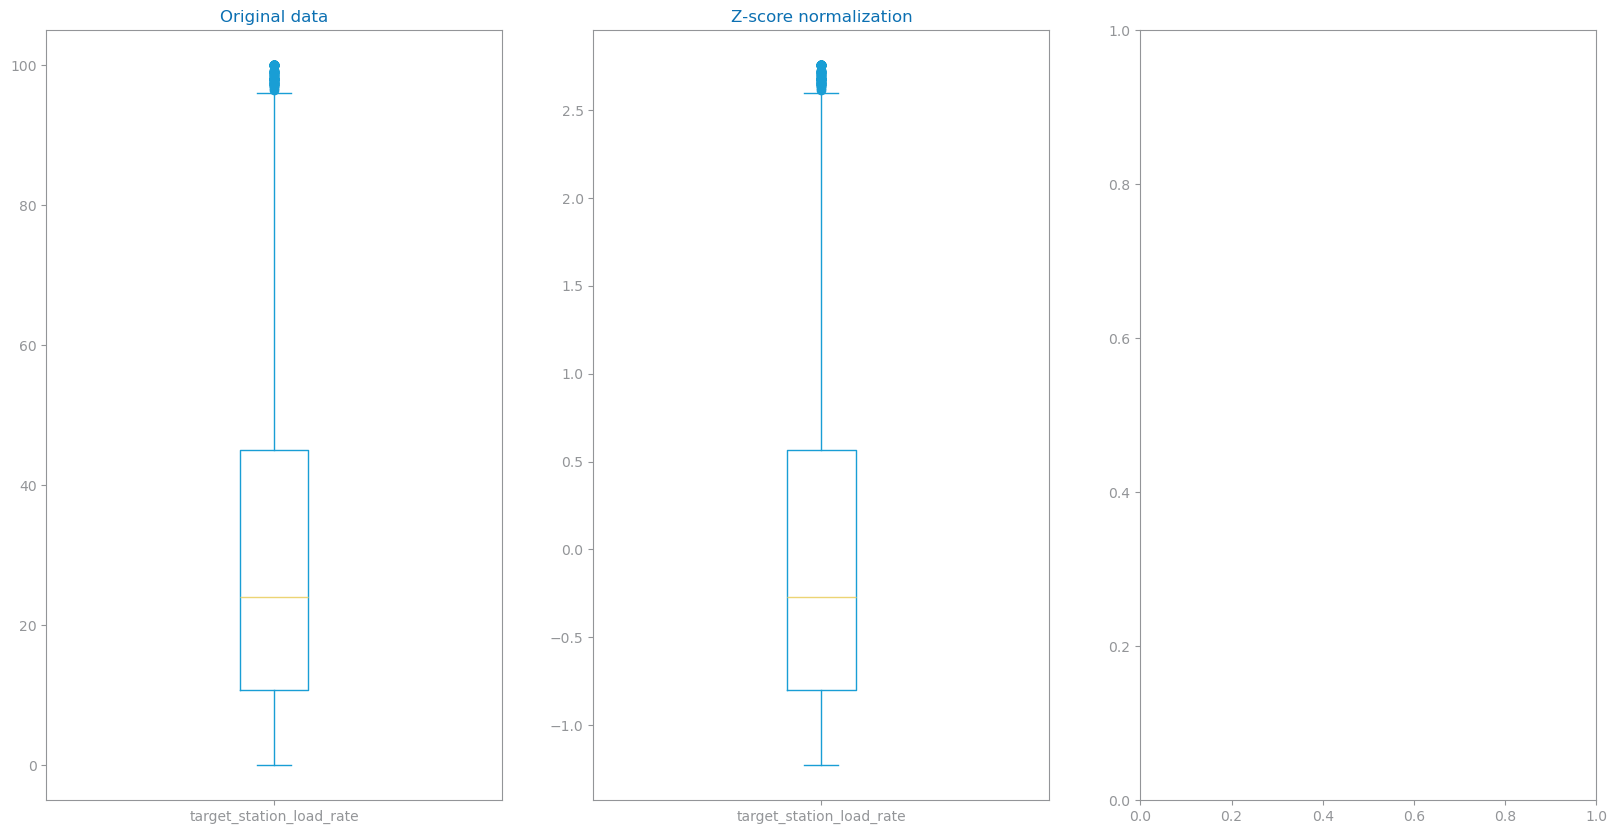

In [357]:
from matplotlib.pyplot import subplots, show, savefig

# Criar os subplots
fig, axs = subplots(1, 3, figsize=(20, 10), squeeze=False)

# Título para o gráfico original
axs[0, 0].set_title("Original data")
# Usando o método boxplot corretamente
series.plot.box(ax=axs[0, 0])  # Corrigido de `series.boxplot` para `series.plot.box`

# Título para o gráfico com normalização Z-score
axs[0, 1].set_title("Z-score normalization")
series_scaled.plot.box(ax=axs[0, 1])  # Também corrigido para `series_scaled.plot.box`

# Salvar o gráfico
savefig(f"images/{file_tag}_scaling_plots_evaluation.png")

# Mostrar o gráfico
show()


In [360]:
series_scaled.head

<bound method NDFrame.head of date
2022-01-01 12:00:00    0.206619
2022-01-01 13:00:00    0.047326
2022-01-01 14:00:00   -0.191614
2022-01-01 15:00:00   -0.430554
2022-01-01 16:00:00   -0.510200
                         ...   
2023-03-31 18:00:00   -0.589847
2023-03-31 19:00:00   -0.430554
2023-03-31 20:00:00   -0.410642
2023-03-31 21:00:00    0.481400
2023-03-31 22:00:00    1.082732
Name: target_station_load_rate, Length: 10814, dtype: float64>

In [101]:
data_0.head()

,temperature_2m,rain_mm,wmo_weather_code,wind_speed_10m,is_holiday_lisbon,target_station_status,target_station_load_rate,station_load_rate_ Rua do Arco Cego / Av. Magalhães Lima,station_load_rate_ Av. Rovisco Pais / Av. Manuel da Maia,station_load_rate_ Praça de Londres,station_load_rate_ Av. Duque de Ávila / Jardim Arco Do Cego,station_load_rate_ Av. Barbosa Du Bocage / Rua Arco do Cego
date,,,,,,,,,,,,
01/01/2022 12:00,16.9,0.0,3,5.4,1.0,1.0,36.0,28.6,50.0,60.0,8.7,16.7
01/01/2022 13:00,17.9,0.0,3,5.5,1.0,1.0,32.0,28.6,46.2,65.0,15.9,16.7
01/01/2022 14:00,18.4,0.0,3,5.6,1.0,1.0,26.0,21.5,41.7,70.0,14.4,20.0
01/01/2022 15:00,18.6,0.0,3,5.8,1.0,1.0,20.0,14.3,37.2,67.5,13.0,10.0
01/01/2022 16:00,17.9,0.0,2,5.9,1.0,1.0,18.0,32.8,5.8,48.6,13.0,10.0


# João's method

In [278]:
display(trnX_0.shape)
display(trnY_0.shape)

display(tstX_0.shape)
display(tstY_0.shape)

(8651, 11)

(8651,)

(2163, 11)

(2163,)

In [279]:
type(train_0)

pandas.core.frame.DataFrame


### Forecasting Evaluation Metrics (Gira Bike - Linear Regression No Scaling) ###
RMSE - Train: 22.0245, Test: 19.1104
MAE - Train: 17.5043, Test: 14.4440
MAPE - Train: 7950146382384708.0000, Test: 248809402315691.6875
R2 - Train: 0.2548, Test: 0.3340



array([<Axes: title={'center': 'Scale-dependent error'}>,
       <Axes: title={'center': 'Percentage error'}>], dtype=object)

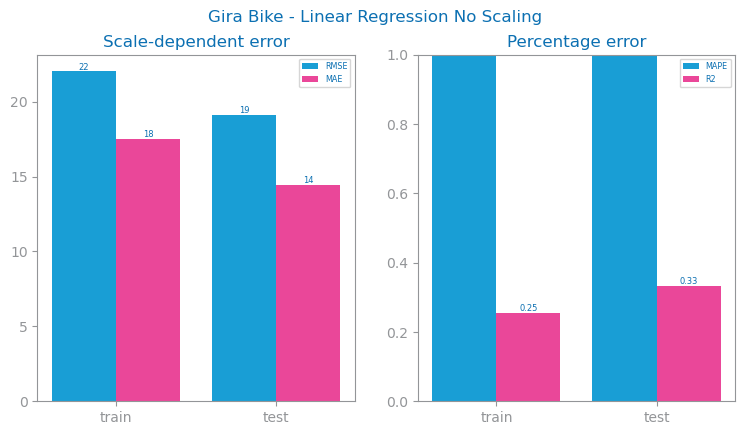

In [280]:
from pandas import Series
from sklearn.linear_model import LinearRegression


data_0 = data.copy()

# Split the data into train and test sets
train_0, test_0 = series_train_test_split(data_0, trn_pct=test_split_threshold)

# Prepare the training and testing data
trnX_0 = train_0.drop(columns=[target])
trnY_0 = train_0[target]
tstX_0 = test_0.drop(columns=[target])
tstY_0 = test_0[target]

# Fit the linear regression model
model_0 = LinearRegression()
model_0.fit(trnX_0, trnY_0)

# Predict the training and testing data
prd_trn_0 = Series(model_0.predict(trnX_0), index=train_0.index)
prd_tst_0 = Series(model_0.predict(tstX_0), index=test_0.index)

# Plot the forecasting evaluation
plot_forecasting_eval(train_0[target], test_0[target], prd_trn_0, prd_tst_0, title=f"{file_tag} - Linear Regression No Scaling")

### Scale 1 strategy Application

# save to csv

In [ ]:
if test_data==False:
    

    data_save=data.copy()

    # apply winning strategy
    # data_save=apply_strategy_2(data_save)

    data_save.reset_index(inplace=True)

        
    data_save.to_csv(f"data/df_gira_scaling_input.csv", index=False)
    

    print(data_save.columns)

Index(['Date', 'Sessions', 'Seven-day active users', '28-day active users',
       'Events per session', 'Add to baskets', 'Average purchase revenue',
       'Purchase revenue', 'Average session duration', 'ARPU', 'ARPPU',
       'Views per user', 'Total users', 'Promotion clicks', 'Sessions Mobile',
       'Seven-day active users Mobile', '28-day active users Mobile',
       'New users Mobile', 'Scrolled users Mobile', 'Engaged sessions Mobile',
       'Views Mobile', 'Event count Mobile', 'Events per session Mobile',
       'Item-list view events Mobile', 'Item view events Mobile',
       'Add to baskets Mobile', 'Checkouts Mobile',
       'E-commerce purchases Mobile', 'Average purchase revenue Mobile',
       'Purchase revenue Mobile', 'First time purchasers Mobile',
       'Average session duration Mobile', 'Sessions (not set)',
       'Sessions affiliate', 'Sessions cpc', 'Sessions cpm', 'Sessions email',
       'Sessions other', 'Sessions referral', 'season', 'commercial_season'